In [1]:
!pip install spacy

In [2]:
!pip install wordcloud

In [3]:
import nltk
import spacy
import string
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

C:\Users\ayush\anaconda3\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
stop_words = set(stopwords.words('english'))

In [6]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [7]:
file_path = "atticus_open_contract_dataset.txt"
with open(file_path, "r", encoding="utf-8") as file:
    text_data = file.readlines()

In [8]:
cleaned_text = [line.strip() for line in text_data if line.strip() and "===" not in line]
cleaned_corpus = " ".join(cleaned_text[:1000])

In [9]:
cleaned_corpus

'CONTRACT UNDERSTANDING ATTICUS DATASET Contract Understanding Atticus Dataset (CUAD) v1 is a corpus of more than 13,000 labels in 510 commercial legal contracts that have been manually labeled to identify 41 categories of important clauses that lawyers look for when reviewing contracts in connection with corporate transactions. CUAD is curated and maintained by The Atticus Project, Inc. to support NLP research and development in legal contract review. Analysis of CUAD can be found at https://arxiv.org/abs/2103.06268. Code for replicating the results and the trained model can be found at https://github.com/TheAtticusProject/cuad. FORMAT The files in CUAD v1 include 1 CSV file, 1 SQuAD-style JSON file, 28 Excel files, 510 PDF files, and 510 TXT files. -  1 master clauses CSV: a 83-column 511-row file. The first column is the names of the contracts corresponding to the PDF and TXT files in the “full_contracts_pdf" and "full_contracts_txt" folders. The remaining columns contain (1) text c

In [10]:
tokens = word_tokenize(cleaned_corpus.lower())

In [11]:
tokens

['contract',
 'understanding',
 'atticus',
 'dataset',
 'contract',
 'understanding',
 'atticus',
 'dataset',
 '(',
 'cuad',
 ')',
 'v1',
 'is',
 'a',
 'corpus',
 'of',
 'more',
 'than',
 '13,000',
 'labels',
 'in',
 '510',
 'commercial',
 'legal',
 'contracts',
 'that',
 'have',
 'been',
 'manually',
 'labeled',
 'to',
 'identify',
 '41',
 'categories',
 'of',
 'important',
 'clauses',
 'that',
 'lawyers',
 'look',
 'for',
 'when',
 'reviewing',
 'contracts',
 'in',
 'connection',
 'with',
 'corporate',
 'transactions',
 '.',
 'cuad',
 'is',
 'curated',
 'and',
 'maintained',
 'by',
 'the',
 'atticus',
 'project',
 ',',
 'inc.',
 'to',
 'support',
 'nlp',
 'research',
 'and',
 'development',
 'in',
 'legal',
 'contract',
 'review',
 '.',
 'analysis',
 'of',
 'cuad',
 'can',
 'be',
 'found',
 'at',
 'https',
 ':',
 '//arxiv.org/abs/2103.06268',
 '.',
 'code',
 'for',
 'replicating',
 'the',
 'results',
 'and',
 'the',
 'trained',
 'model',
 'can',
 'be',
 'found',
 'at',
 'https',
 ':'

In [12]:
tokens = [word for word in tokens if word not in stop_words and word.isalnum()]

In [13]:
tokens

['contract',
 'understanding',
 'atticus',
 'dataset',
 'contract',
 'understanding',
 'atticus',
 'dataset',
 'cuad',
 'v1',
 'corpus',
 'labels',
 '510',
 'commercial',
 'legal',
 'contracts',
 'manually',
 'labeled',
 'identify',
 '41',
 'categories',
 'important',
 'clauses',
 'lawyers',
 'look',
 'reviewing',
 'contracts',
 'connection',
 'corporate',
 'transactions',
 'cuad',
 'curated',
 'maintained',
 'atticus',
 'project',
 'support',
 'nlp',
 'research',
 'development',
 'legal',
 'contract',
 'review',
 'analysis',
 'cuad',
 'found',
 'https',
 'code',
 'replicating',
 'results',
 'trained',
 'model',
 'found',
 'https',
 'format',
 'files',
 'cuad',
 'v1',
 'include',
 '1',
 'csv',
 'file',
 '1',
 'json',
 'file',
 '28',
 'excel',
 'files',
 '510',
 'pdf',
 'files',
 '510',
 'txt',
 'files',
 '1',
 'master',
 'clauses',
 'csv',
 'file',
 'first',
 'column',
 'names',
 'contracts',
 'corresponding',
 'pdf',
 'txt',
 'files',
 'folders',
 'remaining',
 'columns',
 'contain',


In [14]:
stemmed_tokens = [stemmer.stem(word) for word in tokens]

In [15]:
stemmed_tokens

['contract',
 'understand',
 'atticu',
 'dataset',
 'contract',
 'understand',
 'atticu',
 'dataset',
 'cuad',
 'v1',
 'corpu',
 'label',
 '510',
 'commerci',
 'legal',
 'contract',
 'manual',
 'label',
 'identifi',
 '41',
 'categori',
 'import',
 'claus',
 'lawyer',
 'look',
 'review',
 'contract',
 'connect',
 'corpor',
 'transact',
 'cuad',
 'curat',
 'maintain',
 'atticu',
 'project',
 'support',
 'nlp',
 'research',
 'develop',
 'legal',
 'contract',
 'review',
 'analysi',
 'cuad',
 'found',
 'http',
 'code',
 'replic',
 'result',
 'train',
 'model',
 'found',
 'http',
 'format',
 'file',
 'cuad',
 'v1',
 'includ',
 '1',
 'csv',
 'file',
 '1',
 'json',
 'file',
 '28',
 'excel',
 'file',
 '510',
 'pdf',
 'file',
 '510',
 'txt',
 'file',
 '1',
 'master',
 'claus',
 'csv',
 'file',
 'first',
 'column',
 'name',
 'contract',
 'correspond',
 'pdf',
 'txt',
 'file',
 'folder',
 'remain',
 'column',
 'contain',
 '1',
 'text',
 'context',
 'sometim',
 'refer',
 'claus',
 '2',
 'answer',
 

In [16]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 330.3 kB/s eta 0:00:39
     --------------------------------------- 0.0/12.8 MB 330.3 kB/s eta 0:00:39
     --------------------------------------- 0.1/12.8 MB 409.6 kB/s eta 0:00:32
     --------------------------------------- 0.1/12.8 MB 525.1 kB/s eta 0:00:25
     --------------------------------------- 0.2/12.8 MB 756.6 kB/s eta 0:00:17
     --------------------------------------- 0.2/12.8 MB 756.6 kB/s eta 0:00:17
      -------------------------------------- 0.2/12.8 MB 623.6 kB/s eta 0:00:21
      -------------------------------------- 0.3/12.8 MB 714.4 kB/s eta 0:00:18
      -------------------------------------- 0.3/12.8 MB 781.9 kB/s eta 0:00:16
     - ------------------------------------- 0.4/12.8 MB 796.7 kB/s eta 0:00:16
     - ------------------------------------- 0.4/12.8 MB 782.8 kB/s eta 0:00:16
     - ------------------------------------- 0.4

C:\Users\ayush\anaconda3\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [17]:
nlp = spacy.load("en_core_web_sm")
lemmatized_tokens = [token.lemma_ for token in nlp(" ".join(tokens))]

In [18]:
lemmatized_tokens

['contract',
 'understand',
 'atticus',
 'dataset',
 'contract',
 'understand',
 'atticus',
 'dataset',
 'cuad',
 'v1',
 'corpus',
 'label',
 '510',
 'commercial',
 'legal',
 'contract',
 'manually',
 'label',
 'identify',
 '41',
 'category',
 'important',
 'clause',
 'lawyer',
 'look',
 'review',
 'contract',
 'connection',
 'corporate',
 'transaction',
 'cuad',
 'curate',
 'maintain',
 'atticus',
 'project',
 'support',
 'nlp',
 'research',
 'development',
 'legal',
 'contract',
 'review',
 'analysis',
 'cuad',
 'find',
 'https',
 'code',
 'replicating',
 'result',
 'train',
 'model',
 'find',
 'https',
 'format',
 'file',
 'cuad',
 'v1',
 'include',
 '1',
 'csv',
 'file',
 '1',
 'json',
 'file',
 '28',
 'excel',
 'file',
 '510',
 'pdf',
 'file',
 '510',
 'txt',
 'file',
 '1',
 'master',
 'clause',
 'csv',
 'file',
 'first',
 'column',
 'name',
 'contract',
 'correspond',
 'pdf',
 'txt',
 'file',
 'folder',
 'remain',
 'column',
 'contain',
 '1',
 'text',
 'context',
 'sometimes',
 '

In [19]:
processed_text = " ".join(lemmatized_tokens)

In [20]:
processed_text

'contract understand atticus dataset contract understand atticus dataset cuad v1 corpus label 510 commercial legal contract manually label identify 41 category important clause lawyer look review contract connection corporate transaction cuad curate maintain atticus project support nlp research development legal contract review analysis cuad find https code replicating result train model find https format file cuad v1 include 1 csv file 1 json file 28 excel file 510 pdf file 510 txt file 1 master clause csv file first column name contract correspond pdf txt file folder remain column contain 1 text context sometimes refer clause 2 answer correspond 41 category contract see list category category list first row represent file name list category remain 510 row represent contract dataset include text context answer correspond category answer derive text context format unified form 1 json file derive master clause csv follow format squad https question answer dataset whose answer similarly 

In [21]:
vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = vectorizer.fit_transform([" ".join(lemmatized_tokens)])

In [22]:
tfidf_scores = np.array(tfidf_matrix.todense()).flatten()
top_indices = np.argsort(tfidf_scores)[-10:][::-1]
top_words = [vectorizer.get_feature_names_out()[i] for i in top_indices]
top_scores = tfidf_scores[top_indices]

In [23]:
print("Top 10 words by TF-IDF scores:")
print(list(zip(top_words, top_scores)))

Top 10 words by TF-IDF scores:
[('contract', 0.425968990414125), ('category', 0.4211828219825056), ('answer', 0.3733211376663118), ('format', 0.2680254321706854), ('group', 0.22494991628611097), ('party', 0.22016374785449158), ('description', 0.20580524255963342), ('date', 0.20580524255963342), ('agreement', 0.1914467372647753), ('clause', 0.1579435582434396)]


In [24]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(processed_text)

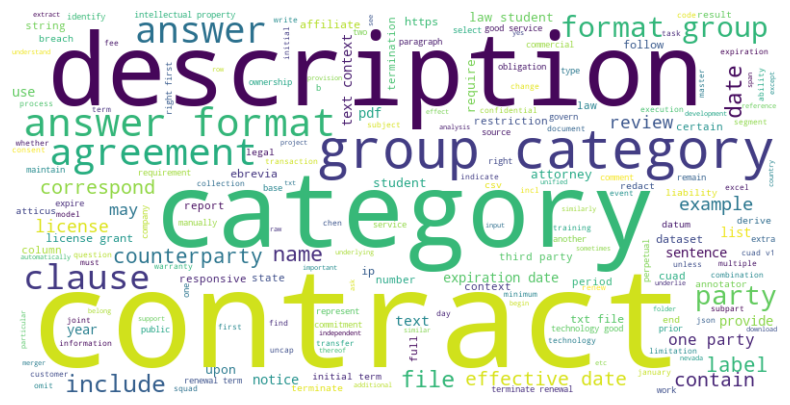

In [25]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [26]:
import matplotlib.pyplot as plt

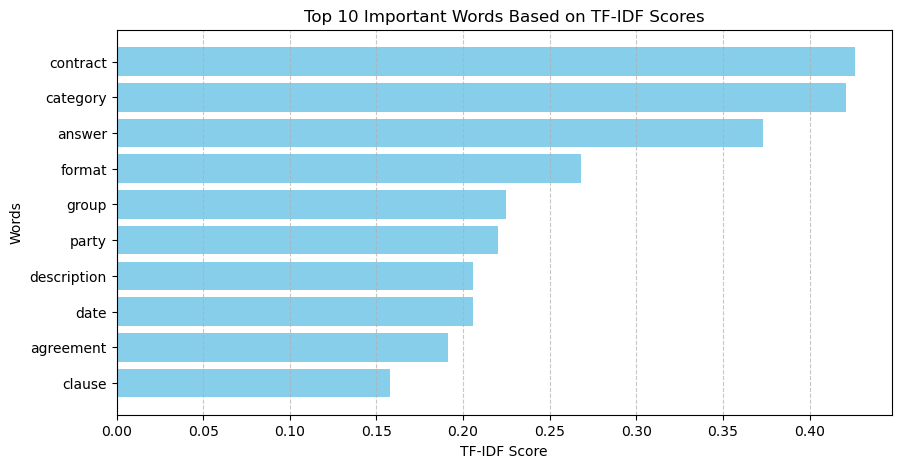

In [27]:
plt.figure(figsize=(10, 5))
plt.barh(top_words[::-1], top_scores[::-1], color='skyblue')  # Reverse to display highest at top
plt.xlabel("TF-IDF Score")
plt.ylabel("Words")
plt.title("Top 10 Important Words Based on TF-IDF Scores")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

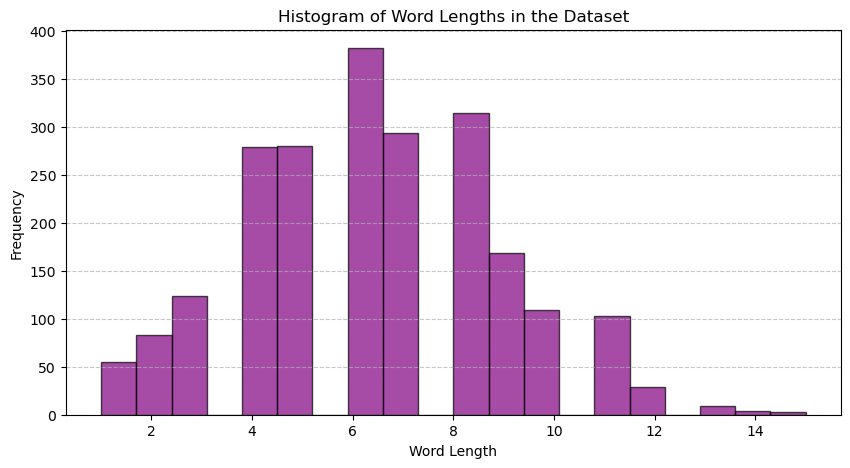

In [28]:
word_lengths = [len(word) for word in lemmatized_tokens]

plt.figure(figsize=(10, 5))
plt.hist(word_lengths, bins=20, color='purple', alpha=0.7, edgecolor='black')
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.title("Histogram of Word Lengths in the Dataset")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [29]:
from collections import Counter

In [30]:
word_counts = Counter(lemmatized_tokens)

In [34]:
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
words, counts = zip(*sorted_word_counts[:50])

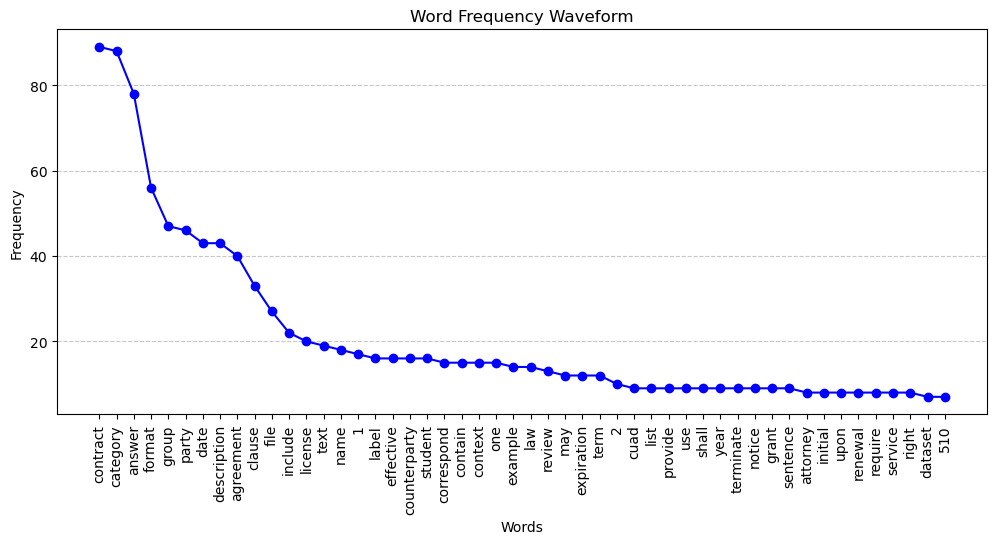

In [35]:
plt.figure(figsize=(12, 5))
plt.plot(range(len(words)), counts, marker="o", linestyle="-", color="blue")
plt.xticks(range(len(words)), words, rotation=90)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Waveform")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()